In [1]:
import keras
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import model_from_json

/home/sagar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
#Model
json_file  =  open('iop_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Weights
loaded_model.load_weights("iop_model.h5")
print("loaded model")

categories = {}
categories[0] = "T-shirt/top"
categories[1] = "Trouser"
categories[2] = "Pullover"
categories[3] = "Dress"
categories[4] = "Coat"
categories[5] = "Sandal"
categories[6] = "Shirt"
categories[7] = "Sneaker"
categories[8] = "Bag"
categories[9] = "Ankle boot"

loaded model


In [29]:
#testing image and preprocessing
path = '/home/sagar/Downloads/iop_test1.jpg'

import cv2
img = cv2.imread(path,0)
img = np.array(img)
img = cv2.resize(img, (28,28)) 
img.astype('float32')
img = img/255.

In [30]:
pre = loaded_model.predict(img[None,:,:,None])

In [31]:
pre


array([[5.8953059e-01, 1.8188619e-05, 3.8490461e-03, 7.3928991e-04,
        5.6124198e-05, 4.9645649e-03, 1.0765067e-02, 1.8799224e-06,
        3.9007401e-01, 1.2415508e-06]], dtype=float32)

predicted class: 


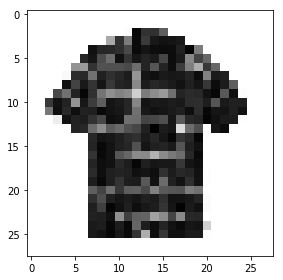

In [37]:
pre = np.argmax(np.round(pre))
print("predicted class: ".format(categories[pre]))
plt.imshow(img, cmap='gray', interpolation='none')
plt.tight_layout()